### #################################################################################################################
### RECONOCEDOR DE VOCALES, LETRAS MINÚSCULAS Y MAYÚSCULAS
### #################################################################################################################

### El objetivo de esta práctica consiste en lograr y entrenar una red neuronal que sea capaz de reconocer las letras vocales, incluyendo letras mayúsculas y minúsculas.

### #################################################################################################################


In [1]:
import keras
keras.__version__ # Comprobar versión actual de Keras

'2.4.3'

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
import os 
#Imprimimos para confirmar que está descargado el dataset
print(os.listdir("../input/letters-dataset/Letters_dataset"))  

['Letters-Test', 'Letters-Prof']


#### #####################################################################################################################################
#### PRESENTACIÓN DEL DATASET
#### #####################################################################################################################################

##### A continuación, cargamos una imagen de prueba de nuestro data set para el entrenamiento de la red neuronal, en este caso se corresponde con letra A mayúscula con fondo blanco (en nuestro dataset incluimos las letras en diferentes formatos y con diferentes fondos).

##### Los dataset han sido formulados de la siguiente forma:

##### · training: Contamos con 10 clases de letras, dos por cada vocal, que suman un total de 395 imágenes diferentes.

##### · validation: Cuenta con 119 imágenes letras vocales, repartidas también en 10 clases. Las imágenes de este dataset no están incluidas en el dataset training.

#### #####################################################################################################################################

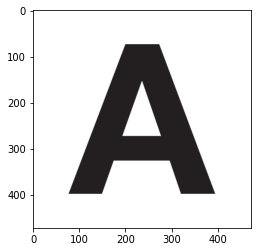

In [4]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

pil_im = Image.open('../input/letters-dataset/Letters_dataset/Letters-Prof/training/0/a.1.jpg', 'r')
imshow(np.asarray(pil_im))

#### #####################################################################################################################################
### PRUEBA GENERACIÓN DE IMÁGENES
#### #####################################################################################################################################

#### DATA AUGMENTATION

##### · Definimos y probamos el funcionamiento del generador de imágenes de entrenamiento usando Data Augmentation mediante ImageDataGenerator.
##### · Definimos la resolución de las imágenes a 150x150 y realizamos reescalado de imágenes tanto para las imagnes de validaciñon cómo para las de entrenamiento.
##### · A parte de entrenar con la imágen orginal, queremos que entrene con la misma imagen pero transformada mediante zoom, rotándola 5 grados y haciendo un flip horizontal. Para la validación no realizaremos ninguna transformación a parte del reescalado.

#### #####################################################################################################################################

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        rotation_range = 5,
        horizontal_flip=True)

In [6]:
validation_datagen = ImageDataGenerator(
        rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        "../input/letters-dataset/Letters_dataset/Letters-Prof/training",
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 395 images belonging to 10 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
        "../input/letters-dataset/Letters_dataset/Letters-Prof/validation",
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 119 images belonging to 10 classes.


#### #####################################################################################################################################
### PRIMER MODELO
#### #####################################################################################################################################

#### ESTADO INICIAL

##### · Empleamos el modelo base del programa para obtener los primeros datos y realizar las primeras pruebas, dividimos entre la generación del modelo y el training para poder realizar cambios y comprobar el funcionamiento más comodamente.
##### · Inicialmente contamos con un batch_size de 20 y 40 epochs.
##### · Empleamos la función de activación Relu, la cual permite que el modelo funcione mejor y aprenda más rápido.
##### · Como el entrenamiento es multietiqueta pero no multiclase (una letra solo puede ser de un tipo, ejemplo: A mayúscula), usaremos Softmax para la capa final.
##### · Se alcanza una presición del modelo cercana al 53%.

#### #####################################################################################################################################

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '../input/letters-dataset/Letters_dataset/Letters-Prof/training'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        rotation_range = 5,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_data_dir = '../input/letters-dataset/Letters_dataset/Letters-Prof/validation'

validation_datagen = ImageDataGenerator(
        rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')


# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(learning_rate=0.1),
              metrics=['accuracy'])

In [ ]:
# TRAINING --------------------------------------------------

epochs = 40

model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
)

#### #####################################################################################################################################
### SEGUNDO MODELO
#### #####################################################################################################################################

#### CAMBIOS

##### · Modificación del learning rate al 0.95.
##### · Aumentamos el número de epochs a 200 para tratar de alcanzar mayor precisión en el modelo.
##### · Añadimos funciones de CALLBACK para mejorar el entrenamiento.
##### · Se incluye histograma para la representación gráfica de los datos.

#### #####################################################################################################################################

#### RESULTADOS

##### · El EarlyStopping no funciona correctamente, detiene muy pronto la ejecución (menos del 20% de las epochs).
##### · Se ha mantenido la precisión del modelo en torno al 50% (en alguna ejecución se ha alcanzado el 59%, pero ha sido un resultado aislado).
##### · Aumento en el escalado de la precisión. 

#### #####################################################################################################################################

In [37]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback 
from keras import regularizers 
from keras import backend as K
import keras
from time import time
import matplotlib.pyplot as plt


# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '../input/letters-dataset/Letters_dataset/Letters-Prof/training'

train_datagen = ImageDataGenerator(
        rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_data_dir = '../input/letters-dataset/Letters_dataset/Letters-Prof/validation'

validation_datagen = ImageDataGenerator(
        rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')



# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(learning_rate=0.95),
              metrics=['acc'])

Found 395 images belonging to 10 classes.
Found 119 images belonging to 10 classes.


#### Las funciones de CALLBACK que vamos a usar son EarlyStopping, para que el entrenamiento pare si ve que no mejora la función de coste tras determinados epochs, y ReduceLROnPlateau, que si el entrenamiento no mejora tras unos epochs específicos, reduce el valor de learning rate del modelo multiplicando por 10 ^ -4, lo que normalmente obtiene una mejora del entrenamiento.

In [38]:
# CALLBACK --------------------------------------------------
es = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)  
r_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)  
callbacks_list = [es, r_lr] 

In [39]:
# TRAINING --------------------------------------------------

epochs = 200

model_history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=callbacks_list
)

Epoch 1/200
20/20 [==============================] - 9s 417ms/step - loss: 2.4076 - acc: 0.0820 - val_loss: 2.2908 - val_acc: 0.2017
Epoch 2/200
20/20 [==============================] - 8s 403ms/step - loss: 2.2614 - acc: 0.1631 - val_loss: 2.2569 - val_acc: 0.2521
Epoch 3/200
20/20 [==============================] - 8s 419ms/step - loss: 2.1326 - acc: 0.2078 - val_loss: 2.2416 - val_acc: 0.1429
Epoch 4/200
20/20 [==============================] - 8s 411ms/step - loss: 2.0925 - acc: 0.2597 - val_loss: 2.0851 - val_acc: 0.3697
Epoch 5/200
20/20 [==============================] - 8s 402ms/step - loss: 1.7704 - acc: 0.3622 - val_loss: 1.9453 - val_acc: 0.3697
Epoch 6/200
20/20 [==============================] - 8s 406ms/step - loss: 1.5955 - acc: 0.4582 - val_loss: 1.8010 - val_acc: 0.4118
Epoch 7/200
20/20 [==============================] - 8s 416ms/step - loss: 1.3994 - acc: 0.5260 - val_loss: 1.9124 - val_acc: 0.4202
Epoch 8/200
20/20 [==============================] - 8s 403ms/step - 

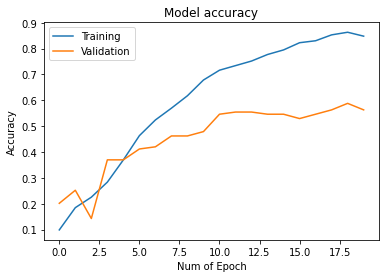

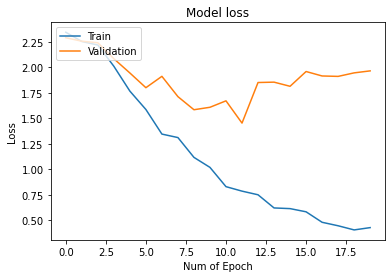

In [40]:
# GRAPHICS --------------------------------------------------

# Plot training & validation accuracy values
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Num of Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Num of Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### #####################################################################################################################################
### TERCER MODELO
#### #####################################################################################################################################

#### CAMBIOS

##### · Se ha añadido una capa de tamaño 64.
##### · Cambio en el MaxPooling2D a 3,3.
##### · Regularización del Dropout para reducir el sobreajuste.
##### · Cambio en la política de EarlyStopping para evitar una parada demasiado temprana del entrenamiento.

#### #####################################################################################################################################

#### RESULTADOS

##### · Se ha evitado una parada temprana del entrenamiento, como consecuencia el entramiento no sesa pese a que no haya aumento en la precisión.
##### · Aumento y estabilización de la precisión del modelo en 66'39%.

#### #####################################################################################################################################

Found 395 images belonging to 10 classes.
Epoch 1/200
20/20 [==============================] - 8s 373ms/step - loss: 2.3290 - acc: 0.1343 - val_loss: 2.2942 - val_acc: 0.1261
Epoch 2/200
20/20 [==============================] - 7s 351ms/step - loss: 2.2972 - acc: 0.1167 - val_loss: 2.2905 - val_acc: 0.1429
Epoch 3/200
20/20 [==============================] - 7s 365ms/step - loss: 2.2979 - acc: 0.0870 - val_loss: 2.2765 - val_acc: 0.1092
Epoch 4/200
20/20 [==============================] - 7s 359ms/step - loss: 2.2946 - acc: 0.1432 - val_loss: 2.2694 - val_acc: 0.1429
Epoch 5/200
20/20 [==============================] - 7s 351ms/step - loss: 2.2594 - acc: 0.1381 - val_loss: 2.2446 - val_acc: 0.2857
Epoch 6/200
20/20 [==============================] - 7s 359ms/step - loss: 2.2450 - acc: 0.1722 - val_loss: 2.1885 - val_acc: 0.3025
Epoch 7/200
20/20 [==============================] - 7s 361ms/step - loss: 2.2409 - acc: 0.1964 - val_loss: 2.1407 - val_acc: 0.2689
Epoch 8/200
20/20 [========

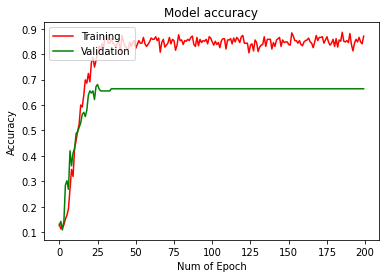

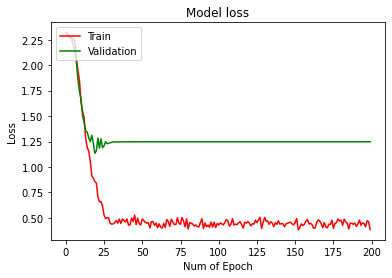

In [36]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback 
from keras import regularizers 
from keras import backend as K
import keras
from time import time
import matplotlib.pyplot as plt


# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '../input/letters-dataset/Letters_dataset/Letters-Prof/training'

train_datagen = ImageDataGenerator(
        rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 3)))


#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.82))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(learning_rate=0.95),
              metrics=['acc'])

# CALLBACK --------------------------------------------------

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3, restore_best_weights=True)  
r_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, verbose=1, patience=4, min_delta=1e-4)  
callbacks_list = [es, r_lr] 

# TRAINING --------------------------------------------------

epochs = 200

model_history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=callbacks_list
)

# GRAPHICS --------------------------------------------------

# Plot training & validation accuracy values
plt.figure(0)  
plt.plot(model_history.history['acc'])  
plt.plot(model_history.history['val_acc']) 
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Num of Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.figure(1)  
plt.plot(model_history.history['loss'])  
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Num of Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#### #####################################################################################################################################
### CUARTO MODELO
#### #####################################################################################################################################

#### CAMBIOS

##### · Al darnos cuenta de que la modificación del EarlyStopping era ineficiente (la ejecución no terminaba pese a no mejorar la precisión del modelo) hemos vuelto a usar la política anterior.

#### #####################################################################################################################################

#### RESULTADOS

##### · Se ha evitado una parada temprana del entrenamiento.
##### · La precisión del modelo ha disminuido levemente al 59,66%.

#### ################################################################################################################################

Found 395 images belonging to 10 classes.
Epoch 1/200
20/20 [==============================] - 8s 374ms/step - loss: 2.3464 - acc: 0.1238 - val_loss: 2.3027 - val_acc: 0.1261
Epoch 2/200
20/20 [==============================] - 7s 364ms/step - loss: 2.3009 - acc: 0.1188 - val_loss: 2.2966 - val_acc: 0.1261
Epoch 3/200
20/20 [==============================] - 7s 355ms/step - loss: 2.3014 - acc: 0.1094 - val_loss: 2.2923 - val_acc: 0.1092
Epoch 4/200
20/20 [==============================] - 7s 355ms/step - loss: 2.2727 - acc: 0.1106 - val_loss: 2.2869 - val_acc: 0.1176
Epoch 5/200
20/20 [==============================] - 7s 356ms/step - loss: 2.2550 - acc: 0.1421 - val_loss: 2.1836 - val_acc: 0.2017
Epoch 6/200
20/20 [==============================] - 7s 358ms/step - loss: 2.2550 - acc: 0.1467 - val_loss: 2.2087 - val_acc: 0.3025
Epoch 7/200
20/20 [==============================] - 7s 354ms/step - loss: 2.1259 - acc: 0.1968 - val_loss: 2.1633 - val_acc: 0.2605
Epoch 8/200
20/20 [========

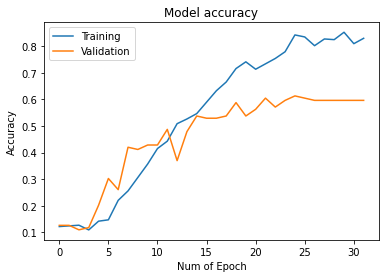

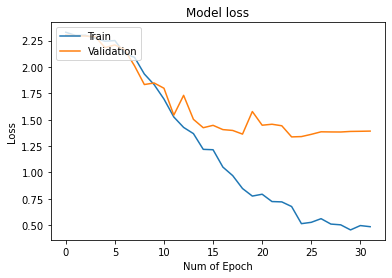

In [41]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback 
from keras import regularizers 
from keras import backend as K
import keras
from time import time
import matplotlib.pyplot as plt


# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '../input/letters-dataset/Letters_dataset/Letters-Prof/training'

train_datagen = ImageDataGenerator(
        rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 3)))


#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.82))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(learning_rate=0.95),
              metrics=['acc'])

# CALLBACK --------------------------------------------------

es = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4) 
r_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, verbose=1, patience=4, min_delta=1e-4)  
callbacks_list = [es, r_lr] 

# TRAINING --------------------------------------------------

epochs = 200

model_history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=callbacks_list
)

# GRAPHICS --------------------------------------------------

# Plot training & validation accuracy values
plt.figure(0)  
plt.plot(model_history.history['acc'])  
plt.plot(model_history.history['val_acc']) 
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Num of Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.figure(1)  
plt.plot(model_history.history['loss'])  
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Num of Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

#### #####################################################################################################################################
### EVALUAR EL ENTRENAMIENTO
#### #####################################################################################################################################

##### · Evaluamos el rendimeinto que hemos obtenido con el validation generator.
##### · Generamos las predicciones con el dataset de validación

#### #####################################################################################################################################

In [19]:
model.evaluate(validation_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False) 

6/6 [==============================] - 1s 169ms/step - loss: 1.7647 - acc: 0.5630


[1.7647417783737183, 0.5630252361297607]

In [15]:
pred = model.predict(validation_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)  
predicted = np.argmax(pred, axis=1)

6/6 [==============================] - 1s 159ms/step


#### Tenemos 5 imagenes diferentes en la carpeta, entre 10 posibilidades, desde A hasta u (letras vocales). De esta manera, la predicción nos devolverá el tipo de letra con la que se debería corresponder la imágen por medio de una matriz de una dimesión o array, encontrándose un 1 en el valor que detecta y un 0 en el resto.

#### La forma de la matriz es la siguiente: [[A a E e I i O o U u]].

#### Por ejemplo, si detectara que estamos ante una a minúscula (lo cual detecta para la primera imágen) el resultado obtenido sería: [[0 1 0 0 0 0 0 0 0 0]]

#### Solamente habría que cambiar el número de la imágen por cualquiera de las otras 5 para realizar la predicción de las mismas.

In [35]:
import cv2
import numpy as np

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(learning_rate=0.95),
              metrics=['acc'])

img = cv2.imread('../input/letters-dataset/Letters_dataset/Letters-Test/1.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = (model.predict(img) > 0.5).astype("int32")

print(classes)

[[0 1 0 0 0 0 0 0 0 0]]
